# Steganography
Steganography is referred to the techniques and methods that allow to hide information within an innocuous-like cover object. The resulting stego-object resembles, as much as possible, the original cover object. Therefore it can be sent over an unsecured communication channel that may be subject to wiretapping by an eavesdropper.

# Steganalysis
Steganalysis refers to detection of the presence of hidden information in the stego-object.
The process of detecting the hidden data which are created using steganography.

#### Connecting to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Importing Libraries

Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN.


Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

SciPy is a free and open-source Python library used for scientific computing and technical computing. It is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python.

tqdm is a Python library that allows you to output a smart progress bar by wrapping around any iterable. A tqdm progress bar not only shows you how much time has elapsed, but also shows the estimated time remaining for the iterable.

Pillow is a fork of the Python Imaging Library (PIL). PIL is a library that offers several standard procedures for manipulating images.

Python Random module is an in-built module of Python which is used to generate random numbers. These are pseudo-random numbers means these are not truly random. This module can be used to perform random actions such as generating random numbers, print random a value for a list or string, etc.

In [ ]:
import os
import skimage.io as sk
import matplotlib.pyplot as plt
from scipy import spatial
from tqdm import tqdm
from PIL import Image
from random import shuffle

import numpy as np
import pandas as pd

#### Connecting to the Alaska-2 Dataset

In [ ]:
BASE_PATH = "/content/drive/My Drive//Datasets/AICS/Project/alaska2_dataset"
train_imageids = pd.Series(os.listdir(BASE_PATH + '/Cover')).sort_values(ascending=True).reset_index(drop=True)
test_imageids = pd.Series(os.listdir(BASE_PATH + '/Test')).sort_values(ascending=True).reset_index(drop=True)

### Contents of the Dataset

Cover contains unaltered images meant for training.

JMiPOD contains examples of the JMiPOD algorithm applied to the cover images.

JUNIWARD contains examples of the JUNIWARD algorithm applied to the cover images.

UERD contains examples of the UERD algorithm applied to the cover images.

Test contains test set of images. These are the images which will be used for prediction.


The main focus steganography algorithms are the use of transferring secret message to a text file, zipping file, a key, converting both zipped file and key into a series of binary codes, and the use of encoding each last two binary codes into pixels in image

In [ ]:
cover_images_path = pd.Series(BASE_PATH + '/Cover/' + train_imageids ).sort_values(ascending=True)
JMIPOD_images_path = pd.Series(BASE_PATH + '/JMiPOD/'+train_imageids).sort_values(ascending=True)
JUNIWARD_images_path = pd.Series(BASE_PATH + '/JUNIWARD/'+train_imageids).sort_values(ascending=True)
UERD_images_path = pd.Series(BASE_PATH + '/UERD/'+train_imageids).sort_values(ascending=True)
test_images_path = pd.Series(BASE_PATH + '/Test/'+test_imageids).sort_values(ascending=True)
ss = pd.read_csv(f'{BASE_PATH}/sample_submission.csv')

#### Visualizing Some Images From Cover Section

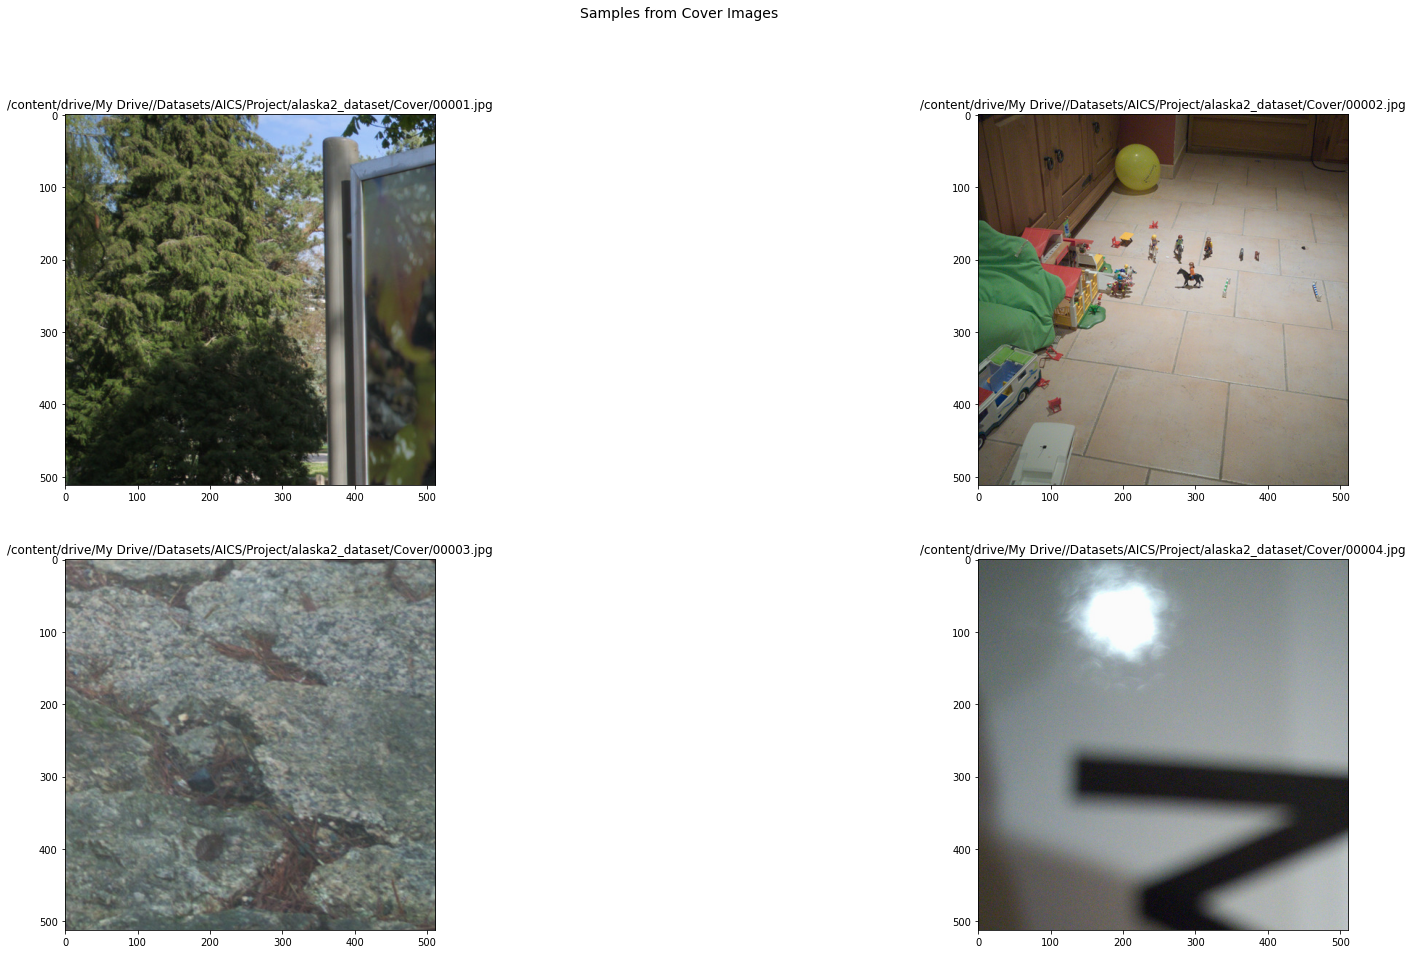

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30, 15))
k=0
for i, row in enumerate(ax):
    for j, col in enumerate(row):
        img = sk.imread(cover_images_path[k])
        col.imshow(img)
        col.set_title(cover_images_path[k])
        k=k+1
plt.suptitle('Samples from Cover Images', fontsize=14)
plt.show()

#### Visualizing Cover and Encoded images side by side

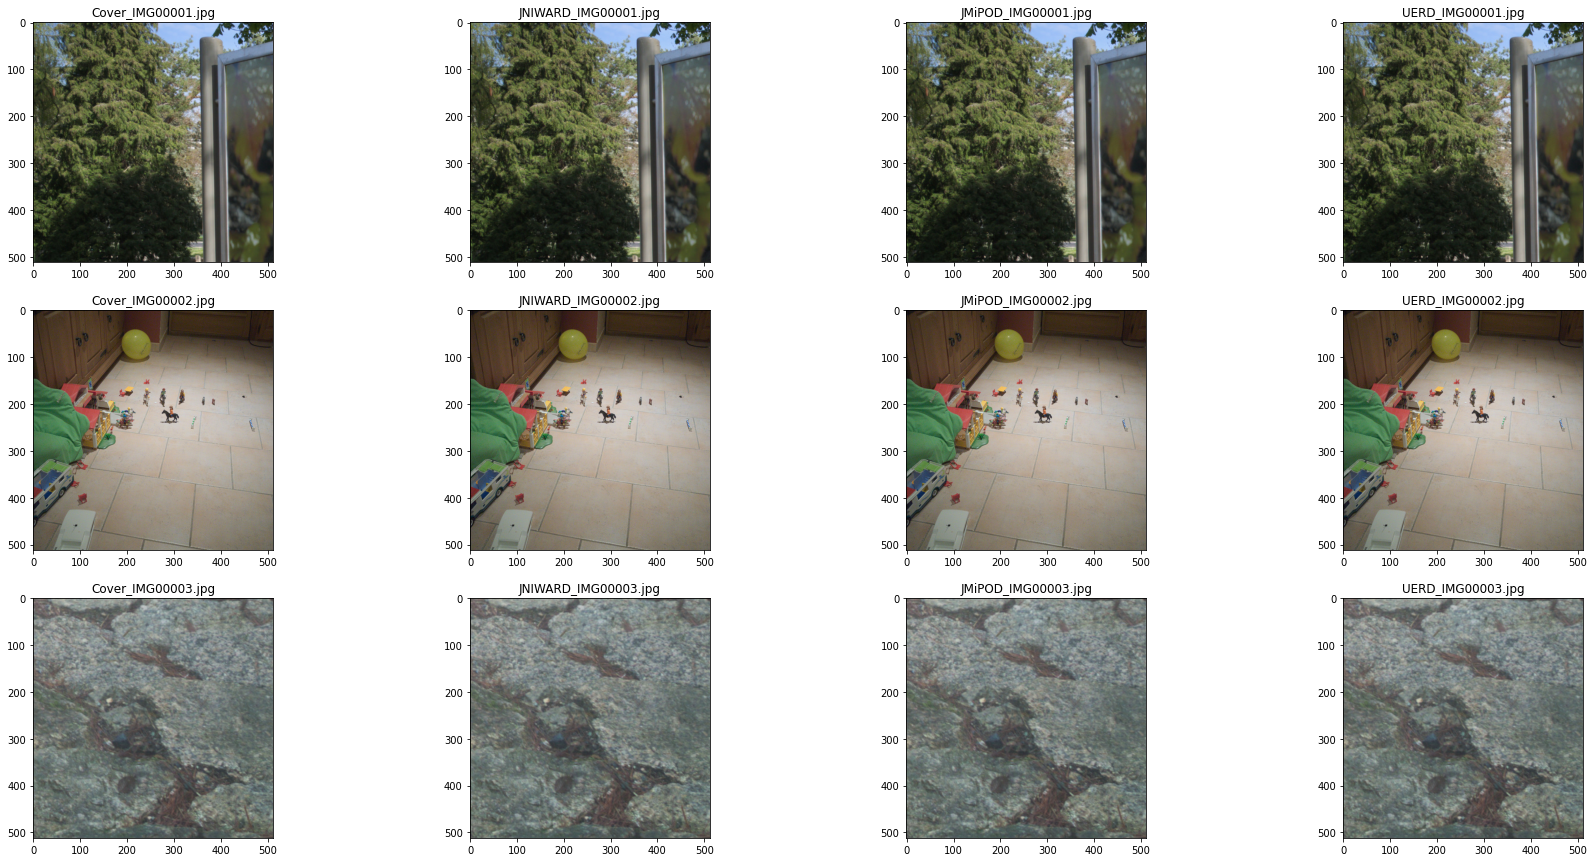

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(30, 15))
for i in range(3):
    cvimg = sk.imread(cover_images_path[i])
    uniimg = sk.imread(JUNIWARD_images_path[i])
    jpodimg = sk.imread(JMIPOD_images_path[i])
    uerdimg = sk.imread(UERD_images_path[i])
    
    ax[i,0].imshow(cvimg)
    ax[i,0].set_title('Cover_IMG'+train_imageids[i])
    ax[i,1].imshow(uniimg)
    ax[i,1].set_title('JNIWARD_IMG'+train_imageids[i])
    ax[i,2].imshow(jpodimg)
    ax[i,2].set_title('JMiPOD_IMG'+train_imageids[i])
    ax[i,3].imshow(uerdimg)
    ax[i,3].set_title('UERD_IMG'+train_imageids[i])

As we expected, there is no difference with the naked eye

#### Visualization of Pixel Deviation in the image channels

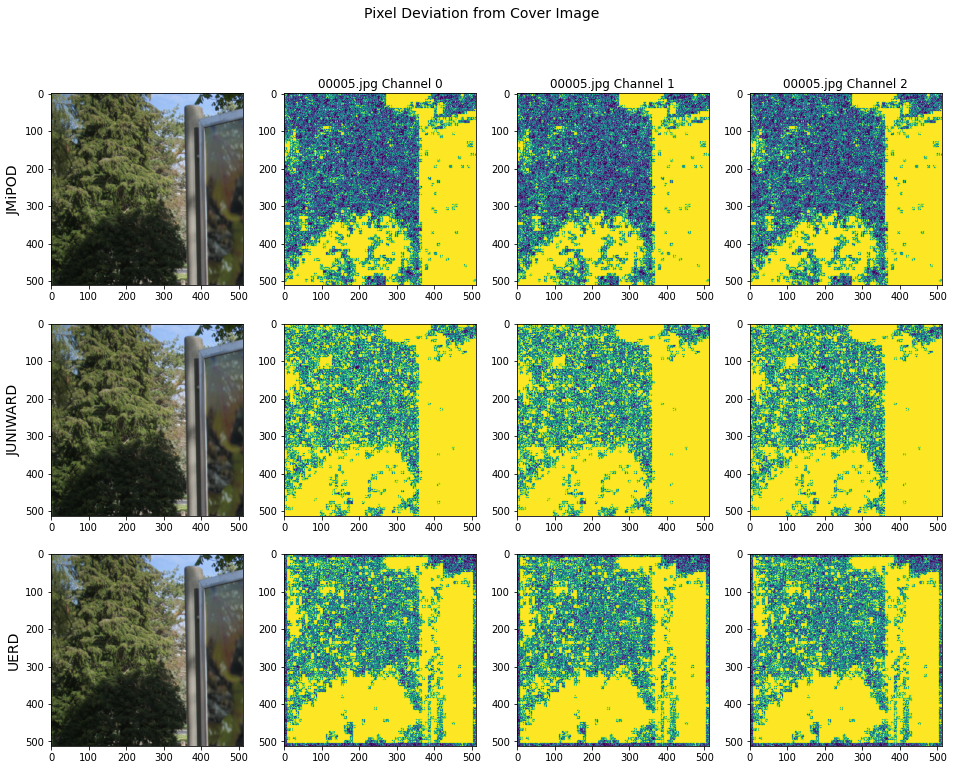

In [ ]:
img_cover = sk.imread(cover_images_path[0])
img_jmipod = sk.imread(JMIPOD_images_path[0])
img_juniward = sk.imread(JUNIWARD_images_path[0])
img_uerd = sk.imread(UERD_images_path[0])


fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
ax[0,0].imshow(img_jmipod)
ax[0,1].imshow((img_cover == img_jmipod).astype(int)[:,:,0])
ax[0,1].set_title(f'{train_imageids[k]} Channel 0')

ax[0,2].imshow((img_cover == img_jmipod).astype(int)[:,:,1])
ax[0,2].set_title(f'{train_imageids[k]} Channel 1')
ax[0,3].imshow((img_cover == img_jmipod).astype(int)[:,:,2])
ax[0,3].set_title(f'{train_imageids[k]} Channel 2')
ax[0,0].set_ylabel('JMiPOD', rotation=90, size='large', fontsize=14)


ax[1,0].imshow(img_juniward)
ax[1,1].imshow((img_cover == img_juniward).astype(int)[:,:,0])
ax[1,2].imshow((img_cover == img_juniward).astype(int)[:,:,1])
ax[1,3].imshow((img_cover == img_juniward).astype(int)[:,:,2])
ax[1,0].set_ylabel('JUNIWARD', rotation=90, size='large', fontsize=14)

ax[2,0].imshow(img_uerd)
ax[2,1].imshow((img_cover == img_uerd).astype(int)[:,:,0])
ax[2,2].imshow((img_cover == img_uerd).astype(int)[:,:,1])
ax[2,3].imshow((img_cover == img_uerd).astype(int)[:,:,2])
ax[2,0].set_ylabel('UERD', rotation=90, size='large', fontsize=14)

plt.suptitle('Pixel Deviation from Cover Image', fontsize=14)

plt.show()

By refering to these visualizations, we cannot compare by the pixel values of RGB channels of normal and stego images.

### What is JPEG?

JPEG is not a file format , but it's a compressing algorithm for an image file to reduce it's size , without losing a lot of information.
Firstly the image is converted into YCbCr from RGB channels. YCbCr and RGB are both colorspaces having different channels where YCbCr consists three channels as Luminance(Y) , Cb(Cb is blue minus luma (B-Y)) , Cr(Cr is red minus luma (R-Y)). 

Then DCT is applied on the pixels of these channels , using DCT coeff.

The image encoded using JPEG algorithm stays in YCbCr colorspace untill it is decoded by an Image viewer software. When a JPEG is read it is decoded and converted back to RGB colorspace to be rendered on screen.

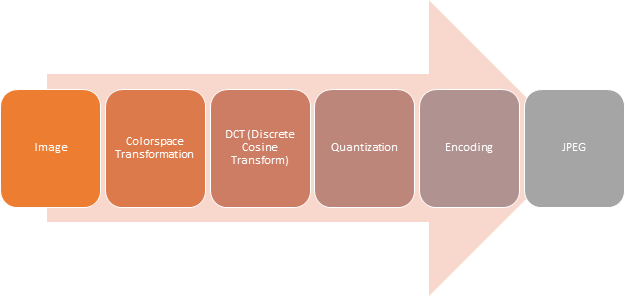

#### What is YCbCr?

YCbCr  is a family of color spaces used as a part of the color image pipeline in video and digital photography systems. Y′ is the luma component and CB and CR are the blue-difference and red-difference chroma components. Y′ is distinguished from Y, which is luminance, meaning that light intensity is nonlinearly encoded based on gamma corrected RGB primaries.

#### Visualizing Different channels of YCbCr colorspace Image

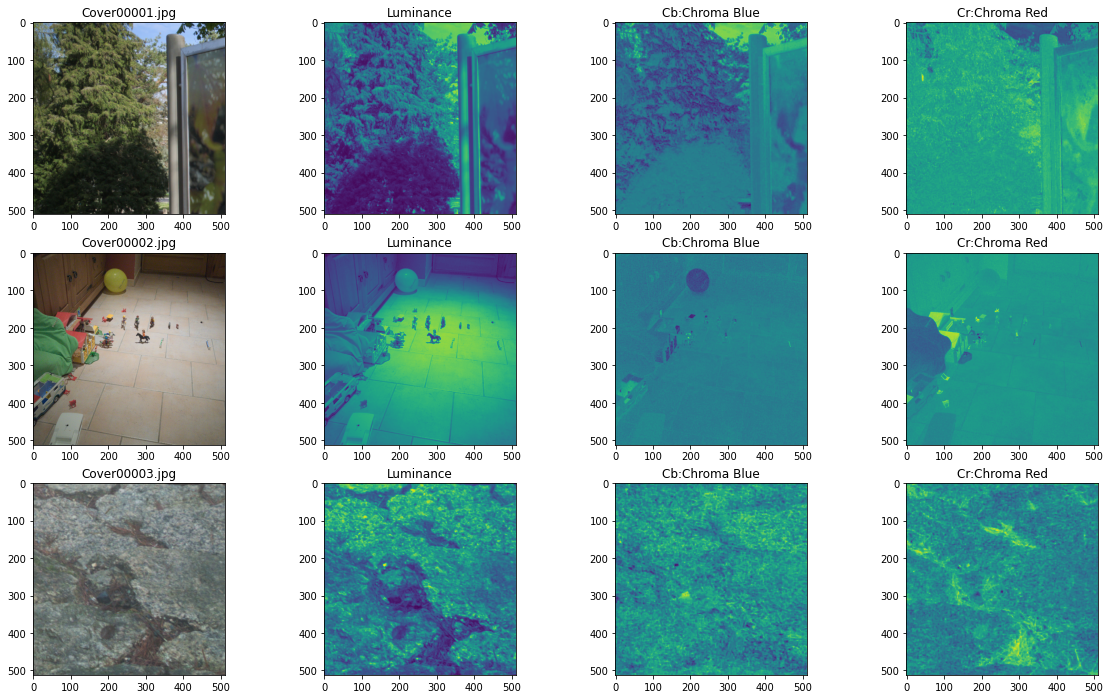

In [ ]:
fig,ax = plt.subplots(3,4,figsize=(20,12))

for i,paths in enumerate(cover_images_path[:3]):
    image = Image.open(paths)
    ycbcr = image.convert('YCbCr')
    (y, cb, cr) = ycbcr.split()

    ax[i,0].imshow(image)
    ax[i,0].set_title('Cover'+train_imageids[i])
    ax[i,1].imshow(y)
    ax[i,1].set_title('Luminance')
    ax[i,2].imshow(cb)
    ax[i,2].set_title('Cb:Chroma Blue')
    ax[i,3].imshow(cr)
    ax[i,3].set_title('Cr:Chroma Red')

#### Visualizing Different channels of YCbCr of Cover and Encoded Image side by side

In [ ]:
fig,ax = plt.subplots(4,4,figsize=(20,16))
plt.tight_layout()


im1 = Image.open(cover_images_path[0])
im2 = Image.open(JUNIWARD_images_path[0])
im3 = Image.open(JMIPOD_images_path[0])
im4 = Image.open(UERD_images_path[0])

for i,image in enumerate([im1,im2,im3,im4]):
    ycbcr = image.convert('YCbCr')
    (y, cb, cr) = ycbcr.split()

    ax[i,0].imshow(image)
    ax[i,0].set_title('Image')
    ax[i,1].imshow(y)
    ax[i,1].set_title('Luminance')
    ax[i,2].imshow(cb)
    ax[i,2].set_title('Cb:Chroma Blue')
    ax[i,3].imshow(cr)
    ax[i,3].set_title('Cr:Chroma Red')

#### What is DCT?
Discrete Cosine Transform (DCT) expresses a finite sequence of data points in terms of a sum of cosine functions oscillating at different frequencies.

DCT coefficients are used for JPEG compression. It separates the image into parts of differing importance. It transforms a signal or image from the spatial domain to the frequency domain. It can separate the image into high, middle and low frequency components.

#### To get DCT Coefficients of Images

In [ ]:
! git clone https://github.com/dwgoon/jpegio

Cloning into 'jpegio'...
remote: Enumerating objects: 1253, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 1253 (delta 46), reused 50 (delta 13), pack-reused 1154
Receiving objects: 100% (1253/1253), 231.60 MiB | 38.56 MiB/s, done.
Resolving deltas: 100% (621/621), done.


#### JpegIO
A python package for accessing the internal variables of JPEG file format such as DCT coefficients and quantization tables.

In [ ]:
import jpegio as jio

#### Plotting DCT Coeffs of Cover and Encoded Image

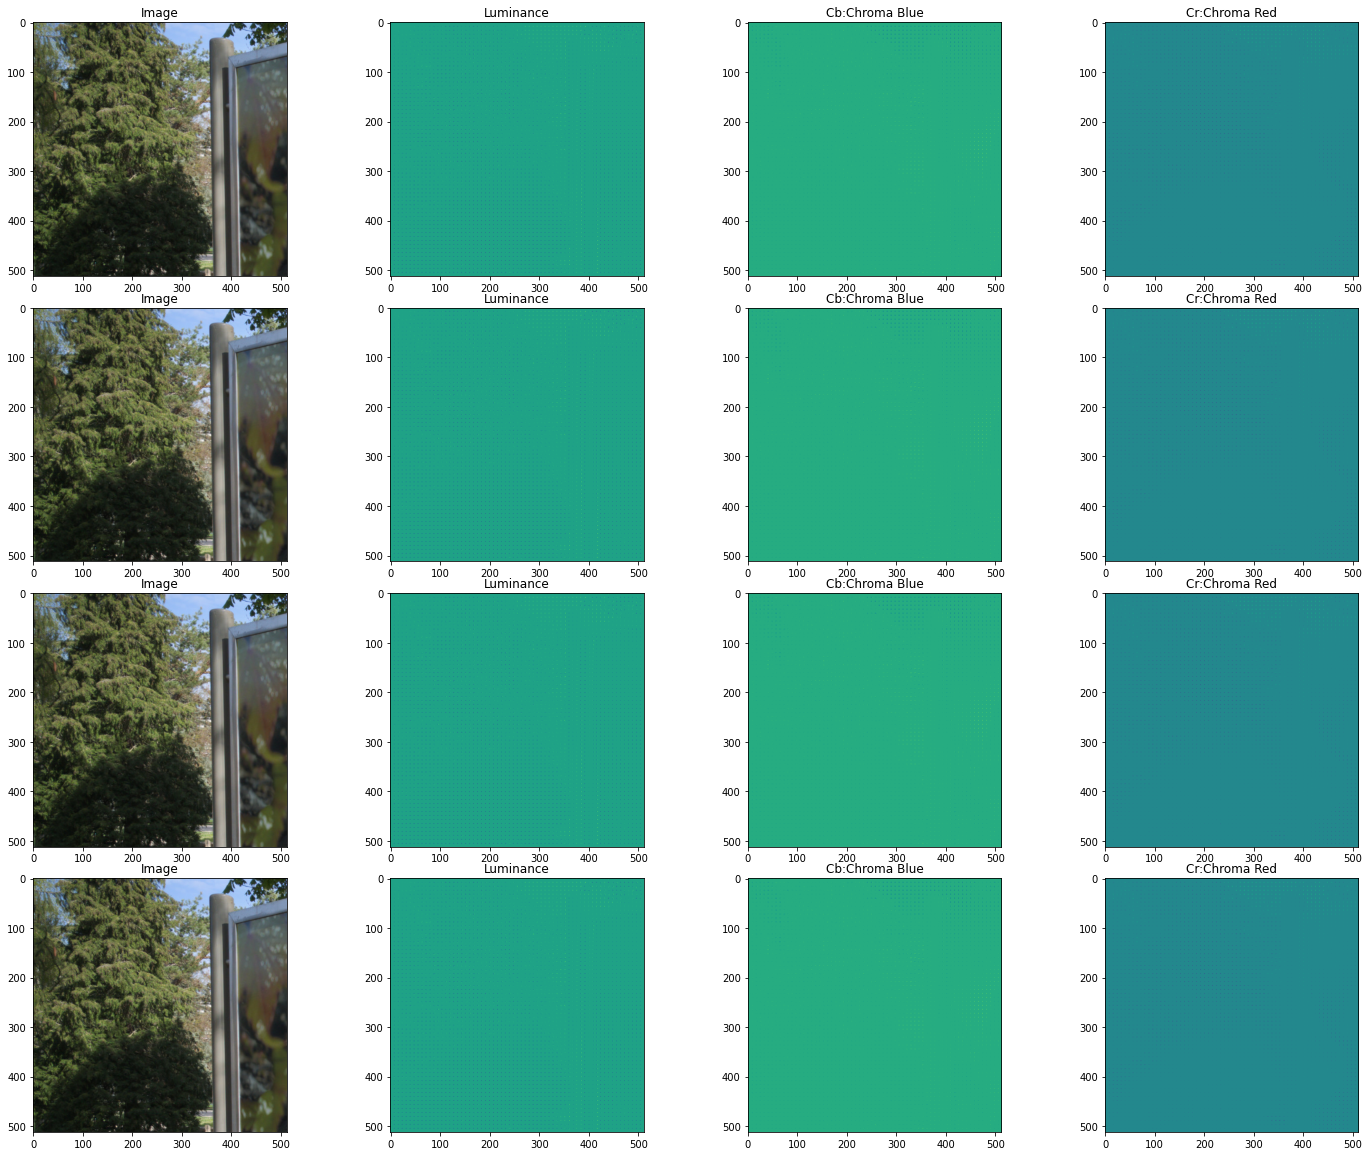

In [ ]:
fig,ax = plt.subplots(4,4,figsize=(20,16))
plt.tight_layout()

for i,path in enumerate([cover_images_path[0],JUNIWARD_images_path[0],JMIPOD_images_path[0],UERD_images_path[0]]):
    
    image = Image.open(path)
    jpeg = jio.read(path)
    DCT_Y = jpeg.coef_arrays[0]
    DCT_Cr = jpeg.coef_arrays[1]
    DCT_Cb = jpeg.coef_arrays[2]
    
    
    ax[i,0].imshow(image)
    ax[i,0].set_title('Image')
    ax[i,1].imshow(DCT_Y)
    ax[i,1].set_title('Luminance')
    ax[i,2].imshow(DCT_Cb)
    ax[i,2].set_title('Cb:Chroma Blue')
    ax[i,3].imshow(DCT_Cr)
    ax[i,3].set_title('Cr:Chroma Red')

#### Looking at differences between DCT values and Pixels

In [ ]:
coverDCT = np.zeros([512,512,3])
stegoDCT = np.zeros([512,512,3])
jpeg = jio.read(cover_images_path[0])
stego_juni = jio.read(JUNIWARD_images_path[0])

5883
[-1.  0.  1.]


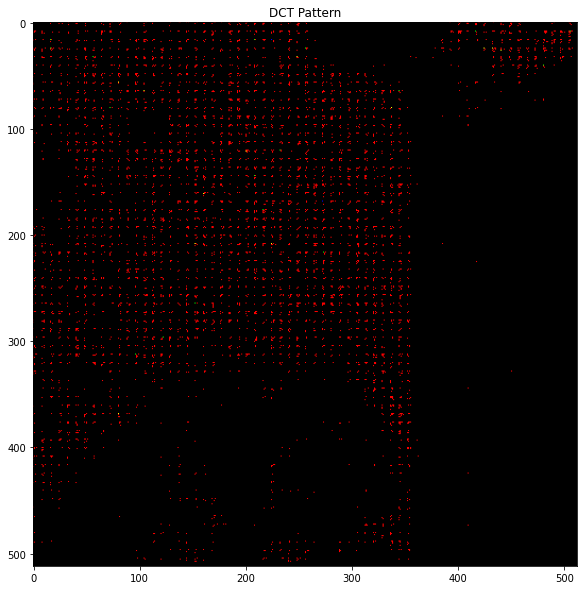

In [ ]:
coverDCT[:,:,0] = jpeg.coef_arrays[0] ; coverDCT[:,:,1] = jpeg.coef_arrays[1] ; coverDCT[:,:,2] = jpeg.coef_arrays[2]
stegoDCT[:,:,0] = stego_juni.coef_arrays[0] ; stegoDCT[:,:,1] = stego_juni.coef_arrays[1] ; stegoDCT[:,:,2] = stego_juni.coef_arrays[2]

DCT_diff = coverDCT - stegoDCT
# So since they are not the same Images the DCT_diff would not be zero
print(len(DCT_diff[np.where(DCT_diff!=0)]))
print(np.unique(DCT_diff))
plt.figure(figsize=(16,10))
plt.imshow(abs(DCT_diff))
plt.title('DCT Pattern')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


161125
[-4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


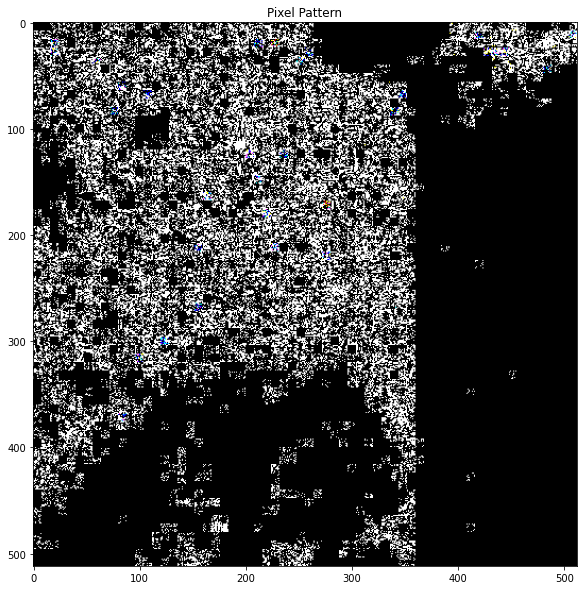

In [ ]:
coverPixels = np.array(Image.open(cover_images_path[0])).astype('float')
stegoPixels = np.array(Image.open(JUNIWARD_images_path[0])).astype('float')

pixelsDiff = coverPixels - stegoPixels

# Since they are not the same Images, the pixels_diff would not be zero
print(len(pixelsDiff[np.where(pixelsDiff!=0)]))
print(np.unique(pixelsDiff))
plt.figure(figsize=(16,10))
plt.imshow(abs(pixelsDiff))
plt.title('Pixel Pattern')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


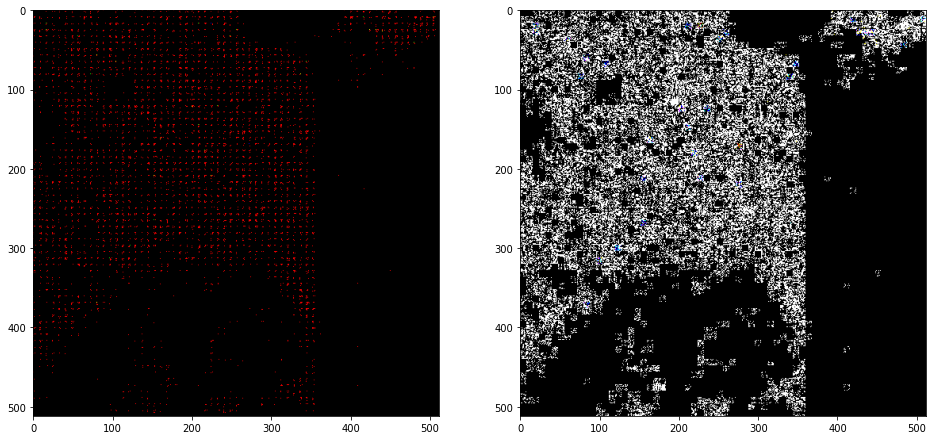

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,12))
ax[0].imshow(abs(DCT_diff))
ax[1].imshow(abs(pixelsDiff))

From the images it is hard to conclude which one works better, as images of both DCT and Pixel pattern give us the same underlying pattern. But one can argue that pixel values contain a lot of noise whereas DCT values do not and can get you a better model.

But from the number of non-zero difference values of both DCT and pixels we can see that Pixels have more non-zero values than DCT and hence Pixels are more distintive for differentiation between cover and stego images.